<a href="https://colab.research.google.com/github/Abhaya264/Colab/blob/main/log_reg0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

files.upload()
data= pd.read_csv('log_reg_1.csv')

Saving log_reg_1.csv to log_reg_1.csv


In [2]:
ir={'Iris-setossa':0,'Iris-setosa':0,'Iris-versicolor':1,'versicolor':1,'Iris-virginica':1}
data.iris=[ir[i] for i in data.iris]

In [3]:
X=np.array(data.values[:,0:4])
X=np.vstack((np.ones(len(X)),X.T)).T
Y=np.array(data.values[:,4])

x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75)


In [4]:
import math
def sigmoid(a):
  ans=np.array([])
  for i in a:
    ans=np.append(ans,1/(1+math.exp(-i)))
  return ans


In [24]:
alpha=0.0001
iter=10000
theta=np.zeros(x_train.shape[1],dtype=float)
m=x_train.size

In [25]:
# z=np.sum(np.multiply(x_train,theta),axis=1)
# print(z)
def grad_desc(theta,alpha,m,iter,x_train,y_train):
  for i in range(iter):
    z=np.sum(np.multiply(x_train,theta),axis=1)
    h=sigmoid(z)
    error=np.subtract(h,y_train)
    y_new=alpha*(1/m)*np.sum(np.multiply(x_train.T,error),axis=1)
    theta=np.subtract(theta,y_new)
  return theta
theta=grad_desc(theta,alpha,m,iter,x_train,y_train)
print(theta)

[ 0.00148017  0.0327719  -0.0222974   0.14626384  0.06119414]


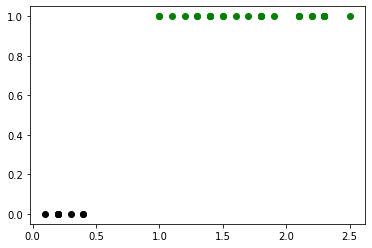

In [36]:
y_res=sigmoid(np.sum(np.multiply(x_test,theta),axis=1))

res=np.zeros(len(y_test),dtype=float)
for i in range(len(y_test)):
  if (y_res[i]>0.6 and y_test[i]==1):
    res[i]=1
  elif (y_res[i]<=0.6 and y_test[i]==0):
    res[i]=2
  elif (y_res[i]<=0.6 and y_test[i]==1):
    res[i]=3
  else:
    print(y_res[i])
import matplotlib.pyplot as plt
for i in range(len(res)):
  if(res[i]==1):
    plt.scatter(x_test[i][4],y_test[i],color='green')
  elif(res[i]==2):
    plt.scatter(x_test[i][4],y_test[i],color='black')
  else:
    plt.scatter(x_test[i][4],y_test[i],color='blue')
    plt.scatter(x_test[i][4],1-y_test[i],color='red')
    # print(y_res[i])